# EDA

In [50]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl
import squarify
plt.rcParams.update(plt.rcParamsDefault)

In [28]:
df = pd.read_csv('spotify_dataset.csv')

In [29]:
df.head()

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


In [30]:
df.columns

Index(['Index', 'Highest Charting Position', 'Number of Times Charted',
       'Week of Highest Charting', 'Song Name', 'Streams', 'Artist',
       'Artist Followers', 'Song ID', 'Genre', 'Release Date', 'Weeks Charted',
       'Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness',
       'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)', 'Valence',
       'Chord'],
      dtype='object')

### Genre formatting

In [31]:
# extract genres
import re
df.Genre = df.Genre.apply(lambda x : str(x).strip("[]"))
df.Genre = df.Genre.apply(lambda x : str(x).rstrip(' \ '' '))
df.Genre = df.Genre.replace(" 'pop'","'pop'")
df.Genre = df.Genre.apply(lambda x : re.sub("'","",x)) 
df.Genre = df.Genre.apply(lambda x : str(x).lstrip(' '))
df.Genre

0                indie rock italiano, italian pop
1                              australian hip hop
2                                             pop
3                                     pop, uk pop
4                         lgbtq+ hip hop, pop rap
                          ...                    
1551                       dance pop, pop, uk pop
1552           sertanejo, sertanejo universitario
1553    dance pop, electropop, pop, post-teen pop
1554                     brega funk, funk carioca
1555                           pop, post-teen pop
Name: Genre, Length: 1556, dtype: object

In [32]:
genre_counts = {}
for idx,r in df.iterrows():
    for x in r.Genre.split(','):
        tmp = x.strip()
        if(tmp not in genre_counts):
            genre_counts[tmp] = 1
        else:
            genre_counts[tmp] += 1
            
genre_counts

{'indie rock italiano': 4,
 'italian pop': 11,
 'australian hip hop': 9,
 'pop': 485,
 'uk pop': 52,
 'lgbtq+ hip hop': 8,
 'pop rap': 164,
 'dance pop': 257,
 'puerto rican pop': 22,
 'trap latino': 155,
 'latin': 154,
 'reggaeton': 157,
 'reggaeton colombiano': 45,
 'k-pop': 45,
 'k-pop boy group': 30,
 'canadian pop': 85,
 'post-teen pop': 256,
 'canadian contemporary r&b': 24,
 'gauze pop': 1,
 'indietronica': 2,
 'shiver pop': 1,
 'latin hip hop': 17,
 'dfw rap': 10,
 'melodic rap': 124,
 'rap': 310,
 'house': 7,
 'pop dance': 54,
 'tropical house': 45,
 'uk dance': 9,
 'electropop': 60,
 'colombian pop': 18,
 '': 86,
 'chicago rap': 47,
 'panamanian pop': 9,
 'latin pop': 15,
 'pop argentino': 1,
 'big room': 1,
 'brostep': 4,
 'dutch edm': 4,
 'edm': 50,
 'electro house': 10,
 'slap house': 17,
 'trance': 2,
 'cali rap': 9,
 'trap argentino': 10,
 'argentine hip hop': 8,
 'pop venezolano': 6,
 'progressive electro house': 4,
 'dreamo': 1,
 'indie surf': 1,
 'surf punk': 1,
 'veg

### Release date formatting

In [33]:
df['Release Date']

0       2017-12-08
1       2021-07-09
2       2021-05-21
3       2021-06-25
4       2021-07-23
           ...    
1551    2017-06-02
1552    2019-10-11
1553    2018-01-12
1554    2019-09-25
1555    2019-11-13
Name: Release Date, Length: 1556, dtype: object

In [34]:
df = df[df['Release Date'].notnull()]
df = df[df['Release Date'] != ' ']

In [35]:
df['Release Date'] = df['Release Date'].apply(lambda x : pd.to_datetime(x))

In [36]:
df['Release Date'] 

0      2017-12-08
1      2021-07-09
2      2021-05-21
3      2021-06-25
4      2021-07-23
          ...    
1551   2017-06-02
1552   2019-10-11
1553   2018-01-12
1554   2019-09-25
1555   2019-11-13
Name: Release Date, Length: 1545, dtype: datetime64[ns]

### index

In [37]:
df = df.set_index('Index')

### highest charting position

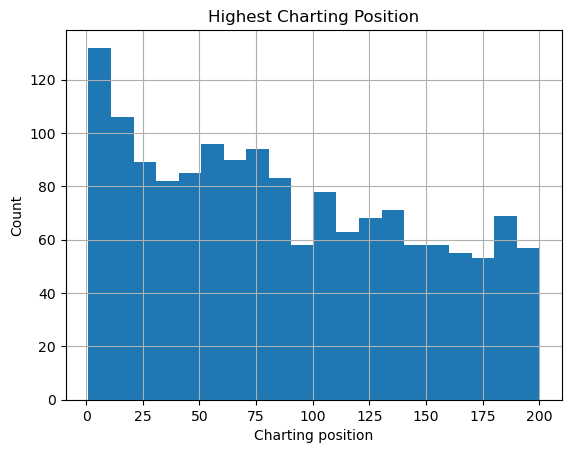

In [38]:
df['Highest Charting Position'].hist(bins=20)
plt.title('Highest Charting Position')
plt.xlabel('Charting position')
plt.ylabel('Count')
plt.show()

### Streams formatting

In [39]:
df.Streams.describe()

count           1545
unique          1545
top       48,633,449
freq               1
Name: Streams, dtype: object

In [40]:
df.Streams = df.Streams.apply(lambda x : x.replace(',',''))
df.Streams = df.Streams.apply(lambda x : int(x))

In [41]:
df.Streams.describe()

count    1.545000e+03
mean     6.337136e+06
std      3.375402e+06
min      4.176083e+06
25%      4.915080e+06
50%      5.269163e+06
75%      6.452492e+06
max      4.863345e+07
Name: Streams, dtype: float64

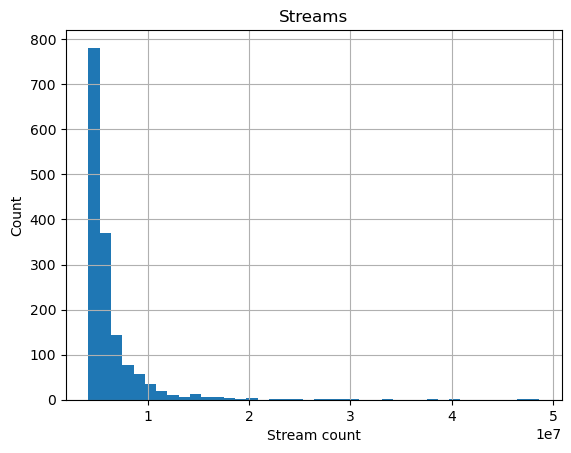

In [42]:
df['Streams'].hist(bins=40)
plt.title('Streams')
plt.xlabel('Stream count')
plt.ylabel('Count')
plt.show()

## Statistics

In [43]:
print('Here are some basic statistics about our data:', end = '\n\n')

print(f'--> There are {len(df)} songs of Spotify in this dataset.', end='\n\n')

first_date = df['Release Date'].min()
last_date = df['Release Date'].max()
print(f'--> The content we have was released between {first_date.year} and {last_date.year}.', end='\n\n')

n_singers = len(df.Artist.unique())
print(f'--> There are {n_singers} unique artists in this Spotify collection.', end='\n\n')

n_genres = len(genre_counts.keys())
print(f'--> There are {n_genres} unique genres.', end='\n\n')

Here are some basic statistics about our data:

--> There are 1545 songs of Spotify in this dataset.

--> The content we have was released between 1942 and 2021.

--> There are 712 unique artists in this Spotify collection.

--> There are 335 unique genres.



### 10 most popular genres

In [44]:
 dict(sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)[:10])

{'pop': 485,
 'rap': 310,
 'dance pop': 257,
 'post-teen pop': 256,
 'pop rap': 164,
 'trap': 159,
 'reggaeton': 157,
 'trap latino': 155,
 'latin': 154,
 'hip hop': 151}

### 10 artists who made the most songs

In [45]:
df.groupby('Artist')['Song Name'].count().sort_values(ascending=False)[:10]

Artist
Taylor Swift     52
Lil Uzi Vert     32
Justin Bieber    32
Juice WRLD       30
BTS              29
Pop Smoke        29
Bad Bunny        28
Eminem           22
The Weeknd       21
Drake            19
Name: Song Name, dtype: int64

### Streams per year

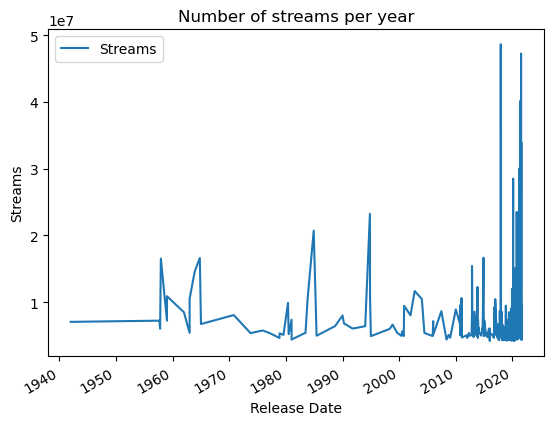

In [46]:
df.plot('Release Date','Streams')
plt.ylabel('Streams')
plt.title('Number of streams per year')
plt.show()
print()

### Most popular genres

In [47]:
!pip install squarify

In [48]:
genre_counts2 = dict((k, v) for k, v in genre_counts.items() if v >= 50)

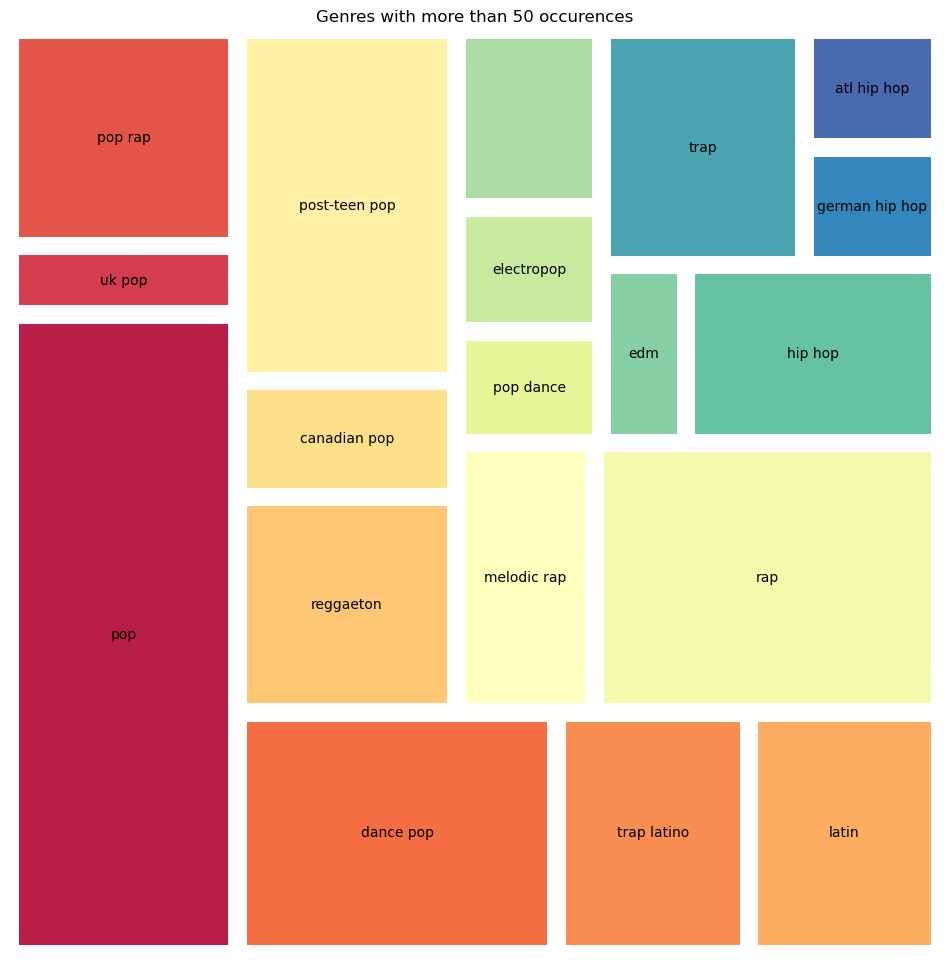

In [69]:

fig=plt.figure(figsize=(12,12))
subplot=fig.add_subplot(1,1,1)

norms = squarify.normalize_sizes(list(genre_counts2.values()),  dx=3, dy=3)
squarify.plot(sizes=norms, label=list(genre_counts2.keys()), color=sns.color_palette("Spectral", 
                                     len(genre_counts2)),alpha=1, pad=1,text_kwargs={'fontsize': 10},ax=subplot)
plt.axis("off")
plt.title('Genres with more than 50 occurences')
plt.show()
print()

### Artists with most streams

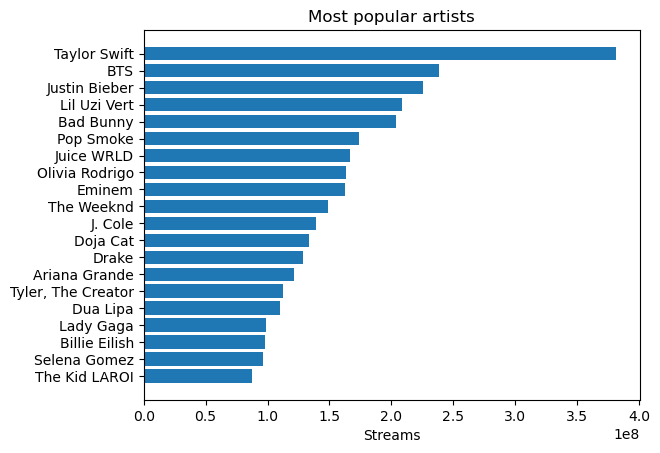

In [96]:
streams_per_artist = df[['Streams','Artist']].groupby('Artist').sum().sort_values(by='Streams',ascending=True)[-20:]

plt.rcdefaults()
fig, ax = plt.subplots()
ax.barh(streams_per_artist.index, streams_per_artist.Streams,align='center')
ax.set_xlabel('Streams')
ax.set_title('Most popular artists')

plt.show()
print()

### Artists that have the most songs

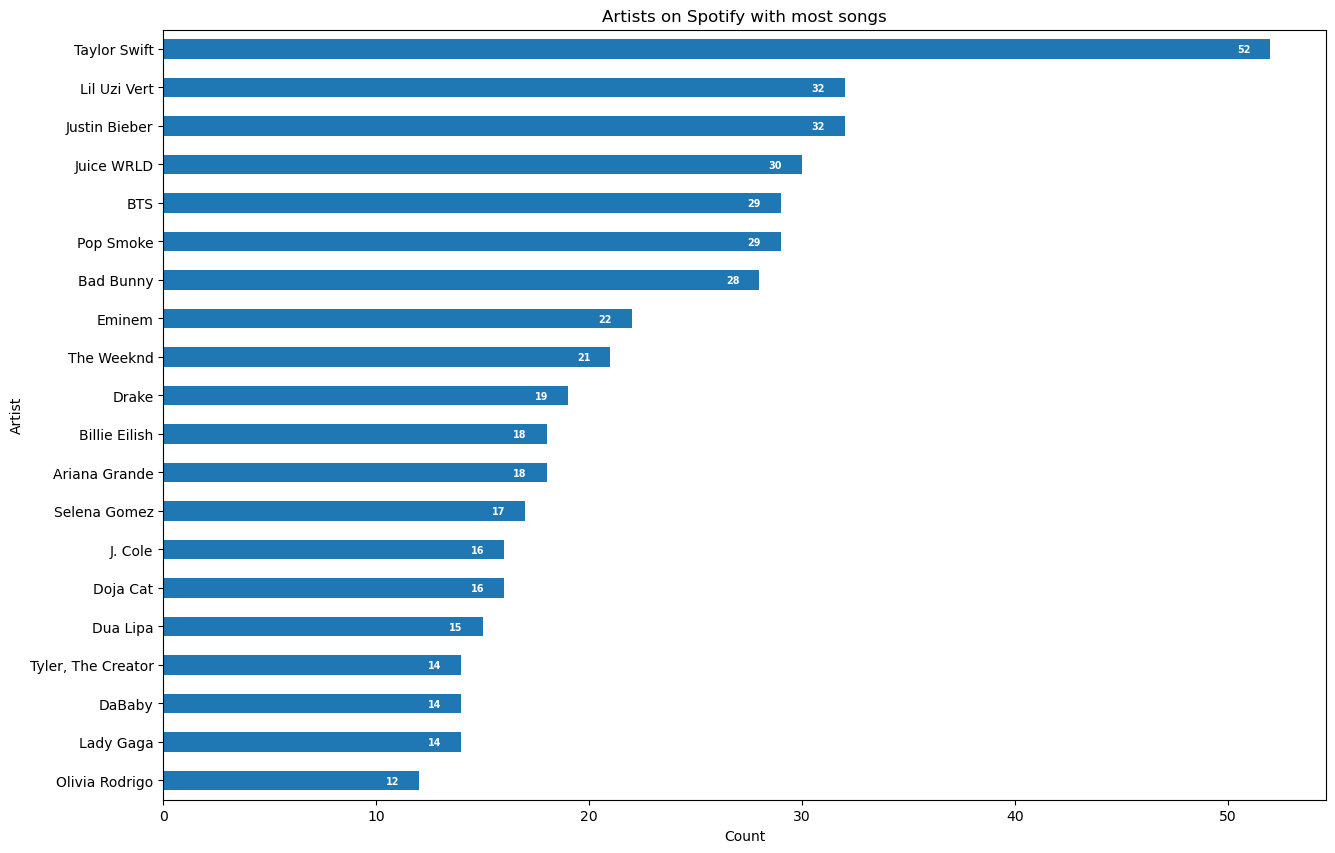

In [97]:
people = df['Artist'].dropna().explode('Artist')
people_count = people.value_counts(sort = True, ascending = True)
nb_people = people.nunique()
top_people = people_count[-20:]
    
fig, ax = plt.subplots(figsize=(15,10))
top_people.plot.barh(y = top_people, ax=ax)

for i, v in enumerate(top_people):
    ax.text((v/top_people.values.max() - 0.03)*top_people.values.max(), 
                i-0.10, str(v), 
            color = 'white', fontweight = 'bold', fontsize = 'x-small')
        
plt.title('Artists on Spotify with most songs')
plt.ylabel('Artist')
plt.xlabel('Count')
plt.show()